<a href="https://colab.research.google.com/github/kmouts/PPS_PatternRecognition/blob/main/Performance_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance Evaluation

Evaluating a predictive model in terms of performance is an important step in the workflow of developing machine learning systems.

 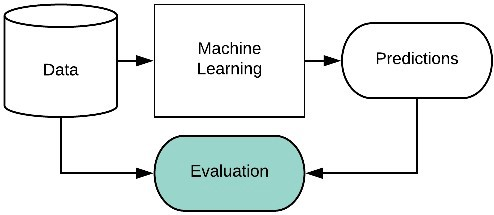

When evaluating the performance of a predictive model, the main issue that concerns machine learning scientists is the following:
*The set of samples that will be utilized for the evaluation (test set) should be **unknown** to the model.*
This requirement is deemed necessary to avoid the undesirable situation of **overfitting**, meaning that the model will demonstrate high performance when predicting the labels of already **"seen"** samples (from the training set), but low when classifying samples from the test set.Therefore, the dataset is split. This division is done in two different ways:


1.   Hold out
2.   Cross-validation

1

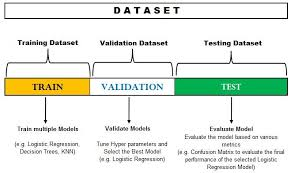

2

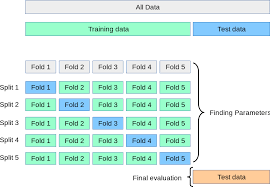




The **hold-out** method is the simple partition of the dataset in three parts:


1.   Training set. The larger in number subset, mainly utilized for the training of the classifier. 
2.   Validation set. The subset of samples, utilized for the assessment of the performance of the classifier. Fine tuning of the parameters/hyperparameters of the classifier is performed by repeatedly benchmarking against different configurations on this set.(Not always applicable) 
3.   Test set. 
Once the model is fine-tuned, the classifier utilizes this unseen subset of samples to measure its performance.







This method is the simplest form of k-fold cross validation and is good to use when a very large dataset is provided or when starting to build an initial model in your data science project. However, this technique may lead to large variations of results since *it is highly dependent on the characteristics of the selected samples*.

On the other hand, the k-fold cross validation alleviates the issue of high variations in results by repeating the procedure k times. The dataset is divided into k subsets that are called **folds**. In each iteration, the k-1 subsets are utilized to form the training set, while the remaining fold to form the validation/test set. An evaluation metric is calculated in each iteration and the metric is averaged over all k trials. Keep in mind that because cross-validation uses multiple train-test splits, it takes more computational power and time to run than using the holdout method.

To get a glimpse of the two methods and their pros and cons we will utilize a predefined dataset from the sklearn library.


In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

The iris dataset is of [Bunch type](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html). In order to be able to take advantage of the pandas library we will transform the bunch to dataframe.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
df.head()

In [ ]:
X = df.drop(columns=['target'])
X.head()

In [ ]:
y = df['target'].values
y[0:5]

# Hold-out method

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3,stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

start = time.time()
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)
end = time.time()

print("Accuracy reported via the hold out method: %0.3f" % (accuracy))
'Time needed:{}'.format(end-start)

# K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

start = time.time()
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
print(cv_scores)
mean_accuracy = cv_scores.mean()
std = cv_scores.std()
end = time.time()

print("Accuracy reported via the k-fold cross validation method: %0.3f (+/- %0.3f)" % (mean_accuracy, std * 2))
'Time needed:{}'.format(end-start)

Conclusions

1.   The difference in time might seem small in such trivial tasks, but with large datasets and more complex models the difference increases dramatically. 
2.   There is a big difference in the reported accuracies. Which is more accurate? Try changing the random state value. What happens?



# Evaluation metrics

# Binary Classification

For the presented example, we randomly utilized the accuracy metric to measure the performance of the knn classifier.
But is it prudent to measure the performance of a classifier with a unique number?
Is this number capable of providing all the necessary information for the predictive model?


In order to better visualize the results of a classification task we utilize the **confusion matrix**, also called an error matrix. A confusion matrix lays out the predicted values of the classifier in comparison with the true values (labels of the samples). In each *simplest* form (binary classification) the confusion matrix takes the following form:
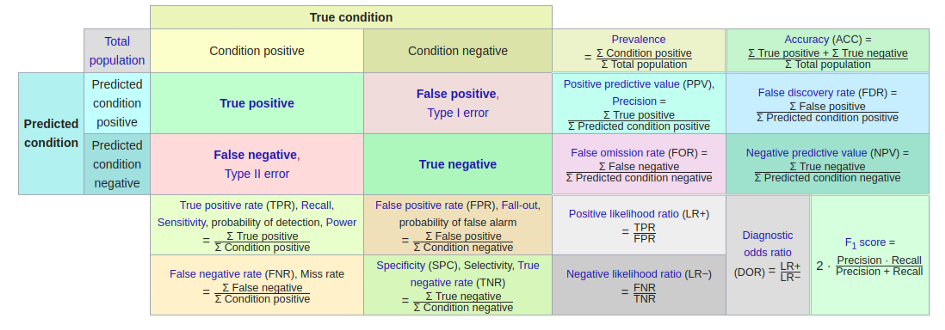 

What we are are mainly interested in initially, are the values:


1.   True positive (TP). The sample is predicted positive and is really positive.
2.   False positive (FP). The sample is predicted positive and is negative in reality.
3.   False negative (FN). The sample is predicted negative and its true value is positive.
4.   True negative (TN). The sample is predicted negative and is really negative.


>$C =
 \begin{pmatrix}
  True\ positive & False\ positive \\
  False\ negative & True\ negative\\
 \end{pmatrix}$

*Here: The rows represent the predicted values and the columns the true values.*

Based on the confusion matrix, the following evaluation metrics can be calculated:


1.   Accuracy.
2.   Recall or sensitivity.
3.   Specificity.
4.   Balanced accuracy.
5.   Negative predictive value.
6.   Positive predictive value.
7.   F1 Score.
8.   ROC AUC Curve.



**Accuracy** is defined as the ratio of correct classified samples divided by the total number of samples, utilized for the evaluation.
>$Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ numbers\ of\ predictions\ made}$

Based on the confusion matrix:

>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

Accuracy is widely utilized as an evaluation metric for classification. It provides an objective value for datasets that are well balanced, meaning that there are almost equal number of samples for each class. However, *when dealing with imbalanced datasets, accuracy may provide a false sense of achieving high performance*. A typical example of such case is the following:
Consider that, there are 910 samples of class A (positive) and 90 samples of class B (negative). A classifier that classifies all samples as class A will have 91% accuracy. This classifier will never be able to classify correctly class B samples, if that is what we are really interested.Therefore, the high accuracy does not depict the real performance of the classifier. 

The confusion matrix for the above mentioned classifier would be the following :
> ||Positive | Negative
>--- | --- | ---
>**Positive**| 910 | 90
>**Negative**| 0 | 0


**Sensitivity or recall** is defined as the ratio of correct positive classified samples divided by the total number of positive samples,utilized for the evaluation.

>$Sensitivity = \frac{Number\ of\ correct\ positive\ predictions}{Total\ numbers\ of\ positive\ samples}$



Based on the confusion matrix:
>$Sensitivity = \frac{TP}{TP+FN}=1-False\ Negative\ Rate$

In some scientific fields sensitivity is of high value. This is the the case of medicine. If a machine learning enginner develops a system that aims to predict a disease, it is vital for the system to demonstrate high sensitivity. If we take a look at the expression defining sensitivity, we will see that high sensitivity reflects to high true positive number and low false negative number. Doctors want to be sure that the system has classified correctly as many positive samples (meaning patients that suffer from the disease and are classified as ill) as possible, but, at the same time the smallest number of false negative samples (meaning samples that suffer from the disease and are classified as healthy). It makes sense. However, consider a system that classifies all samples as positive. This would result in sensitivity equal to 1. 

**Specificity** is defined as the ratio of correct negative classified samples divided by the total number of negative samples, utilized for the evaluation.
>$Specificity = \frac{Number\ of\ correct\ negative\ predictions}{Total\ numbers\ of\ negative\ samples}$

Based on the confusion matrix:
>$Specificity = \frac{TN}{TN+FP}=1-False\ Positive\ Rate$

**Balanced Accuracy** is defined as the sum of the sensitivity and specificity divided by 2.
>$Balanced Accuracy = \frac{Sensitivity +Specificity }{2}$

Based on the confusion matrix:
>$Balanced\ Accuracy = \frac{TP}{2(TP+FN)}+\frac{TN}{2(TN+FP)}$

Balanced accuracy is based on sensitivity and specificity. Sensitivity refers to the ability of a predictive model to classify correctly the positive samples, whereas specificity refers to the ability to classify correctly the negative samples. The average of these two metrics alleviates the problem mentioned earlier about imbalanced datasets. Sensitivity of that dataset would be 91% and specificity 0%, resulting in a 45,5% balanced accuracy.

**Positive Predictive Value or Precision** is defined as the ratio of the correct positive predicted samples divided by the total positive predicted samples.
>$Positive\ Predictive\ Value = \frac{Corrrect\ positive\ predicted\ samples}{Total\ number\ of\ positive\ predicted\ samples}$

Based on the confusion matrix:
>$Positive\ predictive\ value = \frac{TP}{TP+FP}$

In other fields, commercial for instance, precision is deemed to be highly significant. Take, for instance, a recommender system. The system should be designed with the main objective to be certain about the positive predictions it performs. If a customer receives a recommendation that is not in his interests, he will disregard the recommender's future suggestions. High specificity reflects to high number of true negatives and low number of false positives.

Let us see another example of a classifier that provides results for a binary classification problem, as follows:
> ||Positive | Negative
>--- | --- | ---
>**Positive**| 20 | 50
>**Negative**| 30 | 900

The machine learning engineer has been assigned to develop a system for cancer prediction. How should he interact with the predictive model in order to get better results?
Maybe if he could change the parameters of the developed classifier to provide the following results?
> ||Positive | Negative
>--- | --- | ---
>**Positive**| 40 | 50
>**Negative**| 10 | 900 

Sensitivity would increase from 40% to 80%, precision would increase from 28% to 44,4% and accuracy from 92% to 94%.

Lets witness a practical example of how machine learning engineers can tweak a classifier in order to raise for example the recall value. The engineer utilizes the knn classifier to predict the probability of suffering breast cancer.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report


X, y = load_breast_cancer(return_X_y=True)

knn_cv = KNeighborsClassifier(n_neighbors=3)
y_preds = cross_val_predict(knn_cv, X, y, cv=10)
print(confusion_matrix(y,y_preds))
tn, fp, fn, tp = confusion_matrix(y, y_preds).ravel()

print("Sensitivity or recall reported via 3 nearest neighboors: %0.3f" % (tp/(tp+fn)))
print("PPV or precision reported via 3 nearest neighboors: %0.3f" % (tp/(tp+fp)))

knn_cv = KNeighborsClassifier(n_neighbors=100)
y_preds = cross_val_predict(knn_cv, X, y, cv=10)
print(confusion_matrix(y,y_preds))
tn, fp, fn, tp = confusion_matrix(y, y_preds).ravel()


print("Sensitivity or recall reported with 100 nearest neighboors: %0.3f" % (tp/(tp+fn)))
print("PPV or precision reported with 100 nearest neighboors: %0.3f" % (tp/(tp+fp)))

In the above example, changing the knn parameter resulted in lowering the precision value. However, this metric is not so important in predictive models dealing with the prediction of an illness as the recall.

**Negative Predictive Value** is defined as the ratio of the correct negative predicted samples divided by the total negative predicted samples.
>$Negative Predictive Value = \frac{Corrrect\ negative\ predicted\ samples}{Total\ number\ of\ negative\ predicted\ samples}$

Based on the confusion matrix:
>$Negative\ predictive\ value = \frac{TN}{TN+FN}$

**F1 Score or F Score** is the harmonic mean between precision and recall and is expressed by the following equation.
>$F1\ Score = \frac{2*(Precision*Recall)}{Precision+Recall}$

In other classification tasks, the desirable outcome involves achieving both high values of precision and recall. In such tasks, $F_{1}$ Score is employed to measure the performance of the classifier. $F_{1}$ Score tries to balance between precision and recall. The $F_{1}$ Score derives from the 
>$F_{b}= (b^2+1) \cdot \frac{Precision \cdot Recall}{b^2 \cdot Precision+Recall}$ for b=1. 

If we check the extreme values of b, we will see that for b=0, $F_{b}$ converges to Precision, whereas for b-> infinity, $F_{b}$ converges towards Recall. Selecting b=1, means that we choose to take a neutral position in reference to what weighes more, Precision or Recall.$\ F_{1}$ Score is the harmonic mean of precision of recall and it is preferable to utilize against balanced accuracy which is their arithmetic mean, due to the fact that the first manages to mitigate the impact of large outliers more efficiently.In general, it is good to keep in mind that when dealing with rates (precision and recall are rates), better utilize the harmonic mean rather that the arithmetic mean.

Let calculate $\ F_{1} score$ for the breat cancer example: 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

print("Sensitivity or recall reported with 100 nearest neighboors: %0.3f" % (recall_score(y,y_preds)))
print("PPV or precision reported with 100 nearest neighboors: %0.3f" % (precision_score(y,y_preds)))
print("F1 Score reported with 100 nearest neighboors: %0.3f" % (f1_score(y,y_preds)))

In contradiction to other metrics (being single values), **Receiver operating characteristic (ROC)** is a graphical representation of a classifiers' performance.

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=3,stratify=y)
knn.fit(X_train,y_train)
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

For each sample, the classifier predicts a probability of this sample being benign or malignant. The classification task is repeated for different thresholds of this probability. The y axis represents the true posivite rate or sensitivity, while the x axis the false positive rate (FPR = 1- specificity) for different probability thresholds. For example, if we set the threshold to 100%, all samples will be classified as benign and the confusion matrix would be the following:

> ||Positive | Negative
>--- | --- | ---
>**Positive**| 0 | 0
>**Negative**| 910 | 90



Consequently, we would have 0 sensitivity and 1 specificity resulting in 0 FPR.

If we set the threshold to 0%, all samples will be classified as malignant and the confusion matrix would be the following:

> ||Positive | Negative
>--- | --- | ---
>**Positive**| 910 | 90
>**Negative**| 0 | 0


 Consequently we would have 1 sensitivity and 1 FPR. These two points are depicted on the graph above as the bottom left and the top right point of the curve. In between, all the other points correspond to 0-1 probability threshold.The black dotted line represents a classifier with no skill, meaning that for all thresholds, it classifiers all samples as the majority class. The area under the curves - **AUC (Area under curve)** - represents a single value metric for the performance of a classifier. A no skill classifier (as depicted with the black dotted line) has a 0.5 area under curve, whereas the best classifier has 1.
 Main advantages of AUC:

1.   AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
2.   Another benefit of using AUC is that it is classification-threshold-invariant like log loss. It measures the quality of the model’s predictions irrespective of what classification threshold is chosen, unlike F1 score or accuracy which depend on the choice of threshold.



**Note:**When utilizing macro-average the ROC curve is computed independently for each class and then the average is calculated (hence treating all classes equally), whereas with micro-average the ROC curves for all classes are aggregated to compute the average ROC curve.

# Bootstrapping cross validation

Apart from hold out and cross validation, a different technique can be utilized to evaluate the performance of a classifer. This technique is called (empirical) bootstrapping and is the iterative procedure of taking samples from a population (dataset) with replacement. The difference with bootstrapping in comparison with cross validation is that samples may be reutilized. In the case of evaluating a predictive model we repeatedly select a specific ratio of samples, for example 60% for training and 40% for testing and each time we calculate the metric of choice. 

Once the scores are collected, a histogram is created to give an idea of the distribution of (sorted) scores. We would generally expect this distribution to be Gaussian (why?), perhaps with a skew with a symmetrical variance around the mean.

Now, we can calculate the empirical confidence intervals using the [percentile() Numpy function](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html).

The next step is the calculation of the confidence intervals by selecting values at the chosen percentile. The chosen percentile in this case is called alpha. For example, if we were interested in a confidence interval of 95%, then alpha would be 0.95 and we would select the value at the 2.5% percentile as the lower bound and the 97.5% percentile as the upper bound on the statistic of interest. By doing so, we can calculate the probability that the calculated confidence intervals covers the true predictive skill of a classifier. But let's see all these in code:

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DC
import numpy

# configure bootstrap
n_iterations = 1000
n_size = int(len(df) * 0.60)
values = df.values
# run bootstrap
stats = list()
start = time.time()
for i in range(n_iterations):
	# prepare train and test sets
  train = resample(values, n_samples=n_size)
  test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
  trainX, trainY = train[:,:-1], train[:,-1]
  testX, testY = test[:,:-1], test[:,-1]
	# fit model
  model = DC() # SVC()
  model.fit(trainX, trainY)
	# evaluate model
  predictions = model.predict(testX)
  score = accuracy_score(testY, predictions)
  stats.append(score)
end = time.time()
'Time needed:{}'.format(end-start)

In [ ]:
mean_val = np.mean(stats)
# confidence intervals
alpha = 0.95
p = ((1.0 - alpha) / 2.0) * 100
print('p={}'.format(p))
lower = max(0.0, np.percentile(stats, p))
print('lower={}'.format(lower))
p = (alpha + ((1.0 - alpha) / 2.0)) * 100
print('p={}'.format(p))
upper = min(1.0, np.percentile(stats, p))
print('upper={}'.format(upper))

print('\t%.1f probability that the confidence interval: %.1f%% - %.1f%% \n \tcovers the true predictive skill of a classifier' % (alpha * 100, lower * 100, upper * 100))
# plot scores

plt.hist(stats)
plt.axvline(x=lower, color='g', linestyle='dashed', linewidth=2)
plt.axvline(x=upper, color='g', linestyle='dashed', linewidth=2)
plt.axvline(x=mean_val, color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Histogram of ACC by bootstraping 1000 times.\nMean value:{0:.3f}'.format(mean_val))
plt.show()

*( [Caveat Emptor ](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf)on the bootstrap percentile method !)*

# Multi-class Classification

Multi class classification can be considered as an extension of the binary classification task. A big difference is that there are more than one ways to average the results of all classes in order to provide a single value as metric. The calculations for the multi-class classification will be based on the confusion matrix once again.

> ||Class 1| Class 2| Class 3| Class 4|Class 5| Class 6
>--- | --- | ---|---|---|---|---|
>**Class 1**| 4 | 1|0|4|0|0
>**Class 2**| 0 | 10|3|0|0|1
>**Class 3**| 1 | 0 |4|0|4|0
>**Class 4**| 0 | 0 |2|2|0|0
>**Class 5**| 1| 0 |4|0|2|0
>**Class 6**| 0 | 0 |1|1|2|23

**Accuracy** for multi-class classification problems is defined in the same manner with the binary classification. In order to calculate the total accuracy of the classifier, we will compute the ratio of correct classified samples divided by the total number of samples, utilized for the evaluation.
>$Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ numbers\ of\ predictions\ made}$.

 So accuracy is 45/70= 64.2%

And in terms of the confusion matrix the expression is the same as the one for binary classification:
>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}=\frac{4+10+4+2+2+23}{45+1+4+3+1+4+2+1+1+4+1+1+2}=\frac{45}{70}=0.642$

For the following metrics it is essential to define two new concepts: the  **micro-average** and the **macro-average**.As the words state the two concepts are about two different ways of calculating an average quantity.



**Macro-average** averages over the performance for individual classes (larger-groups->macro). When calculating the macro average it is assumed that each class is treated equally.
**Micro-average** averages over the performance for observations(smallest possible group->micro). Therefore, when calculating micro-average, each observation is treated equally.

In order to better capture the diffrence between the micro and macro-average, the following example is provided.

The confusion matrix of a classification task of 4 classes is shown:
> ||Class A | Class B|Class C|Class D
>--- | --- | ---|---|---|
>**Class A**|1|0 |1 |0 | 
>**Class B**|20 |10 |30|40 |
>**Class C**|1 |0 |1|0 |
>**Class D**|0 |0 |1 |1|


Say we want to calculate the precision of each class, provided by the expression:
>$Precision_{c} = \frac{TP_{c}}{TP_{c}+FP_{c}}$ , where c stands for class.


> ||Precision |
>--- | --- |
>**Class A**|0.5|
>**Class B**|0.1 |
>**Class C**|0.5 |
>**Class D**|0.5 |

Calculating the macro-average means the computation of the metric for each class individually and then treating each class equally by adding all metrics together with the same weight, in this example 1/4, where 4 is the number of classes.So the macro average is 
>$Precision_{macro}=\frac{1}{4}*0.5+\frac{1}{4}*0.1+\frac{1}{4}*0.5+\frac{1}{4}*0.5=0.4$

The mathematical expression that dictates these claculations is the following:
$Precision_{macro}=\frac{1}{|c|}\sum_{i=1}^{|c|}\frac{TP_{i}}{TP_{i}+FP_{i}}=\frac{\sum_{i}^{|c|}P_{i}}{|c|}$

Calculating the micro-average means the aggregation of all outcomes across classes and the computation of the metric with the aggregated outcomes. But let's see in practice the micro average: 
>$Precision_{micro}=\frac{1+10+1+1}{1+10+1+1+1+30+40+20+1+1}=0.123$

For micro-average Precision, the equation is the following:
$Precision_{micro}=\frac{\sum_{i=1}^{|c|}TP_{i}}{\sum_{i=1}^{|c|}TP_{i}+FP_{i}}$

As we can observe there is a big difference between the two values. What really happens here is that the macro average, since it treats equally all classes, fails to capture that the the largest portion of samples are misclassified. The errors are covered behind the not so bad performance of the classifier concerning the other classes.Fortunately, micro average, by treating all samples equally, captures the class imbalance and provides a metric that is nearest to the value of the dominant class B. 

**Note:**When comparing micro and macro average, if:


1.   Micro average has lower value than macro-average, the larger classes demonstrate poor performance.
2.   Macro average has lower value than micro-average, the smaller classes demonstrate poor performance.



A different way to calculate $Precision_{micro}$ is by computing the contribution of each class to the metric (as done for $Precision_{macro}$) and posing a weight to each factor, which is is equal to the relative number of samples for each class, as shown below:
 

$\frac{2}{2+100+2+2}*0.5+\frac{100}{2+100+2+2}*0.1+\frac{2}{2+100+2+2}*0.5+\frac{2}{2+100+2+2}*0.5= 0.0189*0.5+0.943*0.1+0.0189*0.5+0.0189*0.5=0.123$

In the same fashion, we can define **macro-average** and **micro-average Recall**:


$Recall_{macro}=\frac{1}{|c|}\sum_{i=1}^{|c|}\frac{TP_{i}}{TP_{i}+FN_{i}}$

$Recall_{micro}=\frac{\sum_{i=1}^{|c|}TP_{i}}{\sum_{i=1}^{|c|}TP_{i}+FN_{i}}$

Let's calculate the Recall metrics for the last example

$Recall_{macro}=\frac{1}{|c|}\sum_{i=1}^{|c|}\frac{TP_{i}}{TP_{i}+FN_{i}}=\frac{1}{4}*\frac{1}{22}+\frac{1}{4}*1+\frac{1}{4}*\frac{1}{33}+\frac{1}{4}*\frac{1}{41}=0.377$

$Recall_{micro}=\frac{\sum_{i=1}^{|c|}TP_{i}}{\sum_{i=1}^{|c|}TP_{i}+FN_{i}}=\frac{1+10+1+1}{22+10+33+41}=0.123$

In the following table we can recognize precision and recall metrics for each class:
> ||Precision |Recall|$F_{1}Score$
>--- | --- |---|---|
>**Class A**|0.5|0.4545|0.0833|
>**Class B**|0.1 |1|0.1818|
>**Class C**|0.5 |0.0303|0.0571|
>**Class D**|0.5 |0.0243|0.0463|

The $F_{1} Score_{macro}$ is calculated by the familiar equation $F_{1} Score = \frac{2*(Precision*Recall)}{Precision+Recall}$ for each class. Then we compute the average, et voila: $\frac{1}{4}*0.0833+\frac{1}{4}*0.1818+\frac{1}{4}*0.0571+\frac{1}{4}*0.0463=0.09$

For the $F_{1} Score_{micro}$ we need to treat all samples equally.Starting by calculating the precision, which the ratio of true positives out of the predicted positives, we will calculate all true positives for all classes.

$TP= 1+10+1+1=13$

Next, we need measure all False Positives. Since we are looking at all the classes together, each prediction error is a False Positive for the class that was predicted.

$FP= 1+1+30+20+40+1+1+1+1=106$

>$Precision_{micro}=\frac{1+10+1+1}{1+1+10+1+1+20+30+40+1+1}=0.123$

In order to calculate the recall, we need to compute the FN.Each prediction error (X is misclassified as Y) is a False Positive for Y, and a False Negative for X. Thus, the total number of False Negatives is again the total number of prediction errors. 

$FN= 1+1+30+20+40+1+1+1+1=106$

>$Recall_{micro}=\frac{1+10+1+1}{1+1+10+1+1+20+30+40+1+1}=0.123$

Therefore: $Precision_{micro}=Recall_{micro}=F_{1}Score=Accuracy$

Since precision and recall are equal, so is their harmonic mean ($F_{1}Score$). Furthermore, since precision and recall reflect in this case the ratio $\frac{Number\ of\ correct\ predictions}{Total\ numbers\ of\ predictions\ made}$, we can be certain that they are both equal to the accuracy.

But let's think a little. Is this the only way to compute $F_{1} Score_{macro}$. If we go back and search for the following expession 
$F_{1}\ Score = \frac{2*(Precision*Recall)}{Precision+Recall}$ it is plausible to consider calculating $F_{1}\ Score_{macro} = \frac{2*(Precision_{macro}*Recall_{macro})}{Precision_{macro}+Recall_{macro}}$.We will call this $F_{1}Score_{macro}^{*}$.Let's compute its value.


It turns out that $F_{1}Score_{macro}^{*}=\frac{2*0.4*0.377}{0.4+0.377}=0.388$

Which one is the correct one?
$F_{1}Score_{macro}^{*}$ or $F_{1}Score_{macro}$

A search in the relevant literature reveals contradictory theories. For someone that wants to dive deeper in the discovery of reasoning against or in favor of one of the two metrics below are some interesting papers:

*  Sokolova, Marina, and Guy Lapalme. “A systematic analysis of performance measures for classification tasks.” Information processing & management 45.4 (2009): 427–437.
* Yang, Yiming, and Xin Liu. “A re-examination of text categorization methods.” SIGIR. Vol. 99. №8. 1999.
* Lewis, David D., et al. “Training algorithms for linear text classifiers.” SIGIR. Vol. 96. 1996.
* Lewis, David D., et al. “Training algorithms for linear text classifiers.” SIGIR. Vol. 96. 1996.
* Opitz, Juri, and Sebastian Burst. “Macro F1 and Macro F1.” arXiv preprint arXiv:1911.03347 (2019).



Generally, when dealing with performance evaluation, a key aspect is being consistent. So it is very important to stick to one of the above mentioned metrics,and more important to stick with the metric which is utilized more. Towards this direction, it is worth mentioning that sklearn library utilizes the $F_{1}Score_{macro}$.

**Important note:**Throughout the whole notebook we have made the assumption that precision and recall weigh equally. This assumption is reflected in the following expression:
>$F_{b}= (b^2+1) \cdot \frac{Precision \cdot Recall}{b^2 \cdot Precision+Recall}$ for b=1. 

Nevertheless , we have already realized that according to the different fields of applications we may want to favor precision against recall or vice versa.

**Receiver operating characteristic (ROC) / Area under curve (AUC)** can be generalized to evaluate classifiers in multi class classification tasks. The idea here is to carry out:


1.   One class vs all other classes
2.   One class vs another class (pairwise comparison)



The first approach corresponds to what we have already learned for binary classification.


In [ ]:
X = df.drop(columns=['target'])
print(X.head())
y = df['target'].values
y[0:5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3,stratify=y)
knn.fit(X_train,y_train)
y_probas = knn.predict_proba(X_test)
y_preds =knn.predict(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()


The second approach is quite different and is described below:
Assume the we have a classification problem with c classes where c>2.Let A(i|j) be the probability that a random sample from class j has lower probability of belonging at class i than a random sample from class i. The opposite stands for A(j|i). In order to calculate A(i|j) we need to compute the probability:

1.  Of belonging to class i for all samples that originate from class i, p(x|y=j).
2.  Of belonging to class i for all samples that originate from class j, p(x|y=i).

The next step is to rank all probalilities in increasing order.Let $r_{l}$ be the rank of the l-th observation from class i. Then the total number of pair of points in which the class j has a smaller estimated probability of belonging to class i the the class iis given by the equation:
$\sum_{i=1}^{n_{i}}r_{l}-l=\sum_{i=1}^{n_{i}}r_{l}-\sum_{i=1}^{n_{i}}l=S_{i}-n_{i}(n_{i}+1)/2$, where $S_{i}$ is the sum of the ranks from the class i samples. Because there are $n_{0}n_{1}$ pairs of points from two classes, the probability that a randomly chosen class j point has a lower estimated probability of belonging to class i than a randomly chosen class i point is:  
$A(i|j)=\frac{S_{i}-n_{i}(n_{i}+1)/2}{n_{0}n_{1}}$. Since we cannot distinguish A(i|j) from A(j|i), we define $A(i|j)=\frac{1}{2}*(A(i|j)+A(j|i))$. The final step is to compute the mean value for all distinct pairs as:
$M=\frac{2}{c(c+1)}\sum_{i<j}A(i,j)$. The denominator takes the above mentioned form since there are c(c+1) to form distinct pairs and we compute only half of them.

An example will shed light to this confusing description:
Let's assume that we have already computed the probabilities of belonging to class i for some samples that originate from class j and the probabilities are:
0.1  0.04 0.42 0.3  0.23 0.15
On the other hand probabibilities of belonging to class i for samples that originate from class i are:
0.89 0.67 1 0.39 0.92 0.96 0.57
Sorting the above probabilities in increasing order results in the following table:
> |1st |2nd|3rd|4th|5th|6th|7th|8th|9th|10th|11th|12th|13th
>--- | --- |---|---|---|---|---|---|---|---|---|---|---|
>**Probabilities $r_{l}$**|0.04|0.15|0.23|0.3|0.39|0.42|0.57|0.67|0.89|0.92|0.96|1

 But we are only interested in the ranks for the samples that originate from class i:
>
>$S_{i}=\sum_{l=1}^{r_{l}}=6+8+9+10+11+12+13=69$

And the requested probability $A(i|j)=\frac{69-(6*7)/2
}{7*8}=0.976$
